# Generating correlated input to population units

We need to generate a network with population units. Please run the ```population_unit_network.ipynb``` example notebook first. That notebook will generate the network in ```networks/population_unit_network/``` which has dSPN and iSPN, and two population units ```1``` and ```2```, and a subset of neurons belonging to neither population unti.

In the config file ```input_config/simple-input-3.json``` we specify cortical input to both dSPN and iSPN.

All dSPN will receive cortical input, but the input to population unit ```1``` will have correlations within the population (```populationUnitCorrelation```), and likewise for population unit ```2```. The neurons without a population unit will also receive input, but that will only have correlation within the neuron itself. In other words, each dSPN see correlation within their input receive, but only those belonging to a population unit has correlations in the input with other neurons.

For the iSPN neurons we have also specified ```populationUnitID``` which means that only the iSPN belonging to population unit ```1``` will receive this input.

We have also introduced a 10 ms ```jitter``` to the input spikes in this example.

```
{
    "dSPN": {
        "Ctx" : {
            "generator" : "poisson",
            "frequency" : 1,
            "conductance" : 0.5e-9,
            "nInputs" : 10,
            "populationUnitCorrelation" : 0.5,
            "jitter" : 0.01,	    
            "modFile": "tmGlut"
        }
    },

    "iSPN": {
        "Ctx" : {
            "generator" : "poisson",
            "frequency" : 1,
            "conductance" : 0.5e-9,
            "nInputs" : 10,
            "jitter" : 0.01,
            "populationUnitCorrelation" : 0.2,
            "populationUnitID" : 1,
            "modFile": "tmGlut"
        }
    }
}
```

In [1]:
import os
from snudda.input import SnuddaInput
network_path = os.path.join("networks","population_unit_network")
si = SnuddaInput(network_path=network_path, 
                 input_config_file=os.path.join("input_config","simple-input-3.json"),
                 verbose=False)
si.generate()

Loading 2000 neurons with 1115406 synapses and 0 gap junctions
Writing spikes to networks/population_unit_network/input-spikes.hdf5


In [2]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file)

Loading 2000 neurons with 1115406 synapses and 0 gap junctions


### Plotting the correlation in the input

In this first plot we show the spikes for neurons not having a population unit (i.e. 0). Note that the correlations are only within the individual neuron.

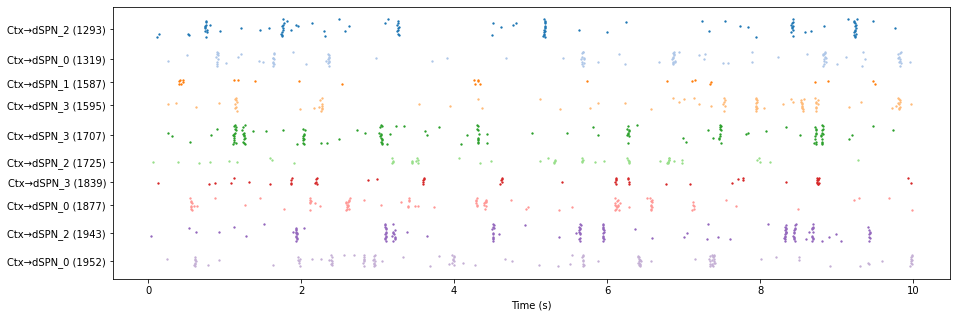

In [3]:
spi.plot_input_population_unit(population_unit_id=0, num_neurons=10, neuron_type="dSPN", fig_size=(15,5))

Next we look at the correlation in population unit 1 (first figure) and population unit 2 (second figure), here we only look at dSPN. Notice that the correlation is now throughout the population unit.

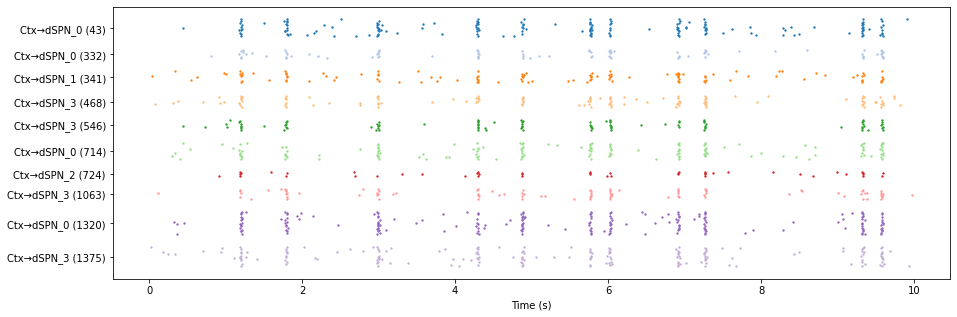

In [4]:
spi.plot_input_population_unit(population_unit_id=1, num_neurons=10, neuron_type="dSPN", fig_size=(15,5))

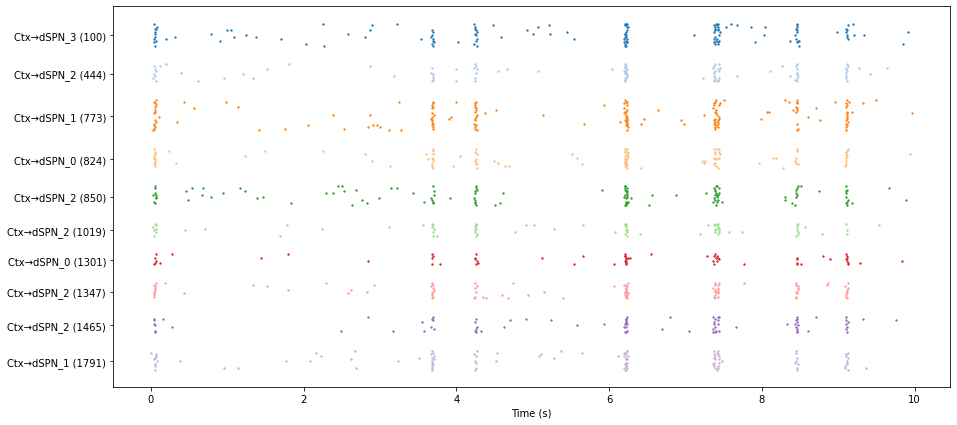

In [5]:
spi.plot_input_population_unit(population_unit_id=2, num_neurons=10, neuron_type="dSPN", fig_size=(15,7))

Finally we look at the input for the iSPN. Remember that in our config file we specified ```populationUnitID: 1``` in the iSPN block. This means that the input specified is only for that particular population unit. This means only iSPN belonging to that population unit will receive input, but no other.

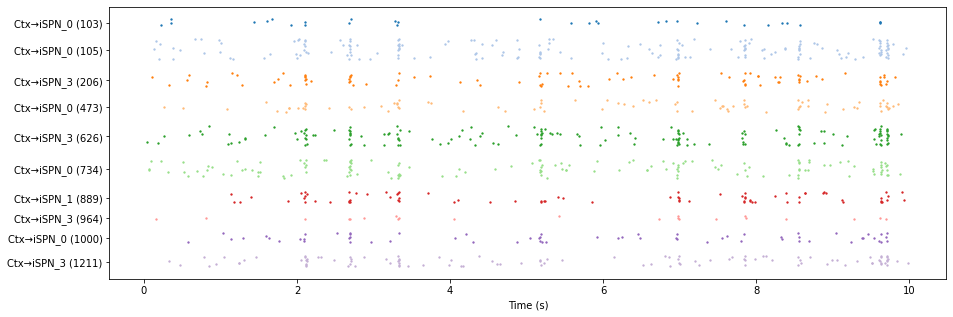

In [6]:
spi.plot_input_population_unit(population_unit_id=1, num_neurons=10, neuron_type="iSPN", fig_size=(15,5))

The below plot is _empty_ because there is no input specified for iSPN neurons in population unit 2 in our example.

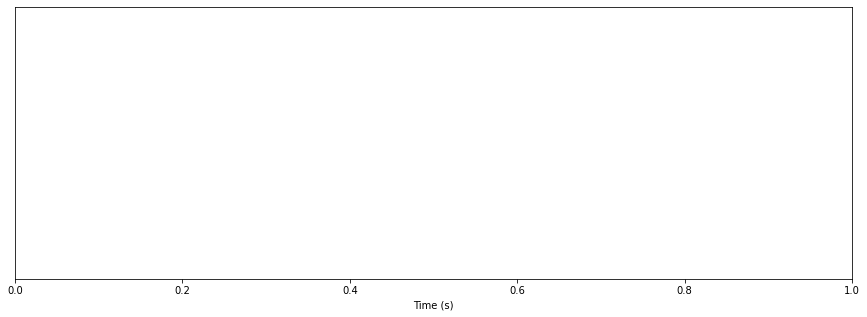

In [7]:
spi.plot_input_population_unit(population_unit_id=2, num_neurons=10, neuron_type="iSPN", fig_size=(15,5))